In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib seaborn pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

target_or = np.array([
    0,
    1,
    1,
    1
])

target_and = np.array([
    0,
    0,
    0,
    1
])

target_xor = np.array([
    0,
    1,
    1,
    0
])

In [4]:
clf = svm.SVC(kernel='linear')
clf.fit(data_scaled, target_or);

Plotting code derived from [this tutorial](https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html).

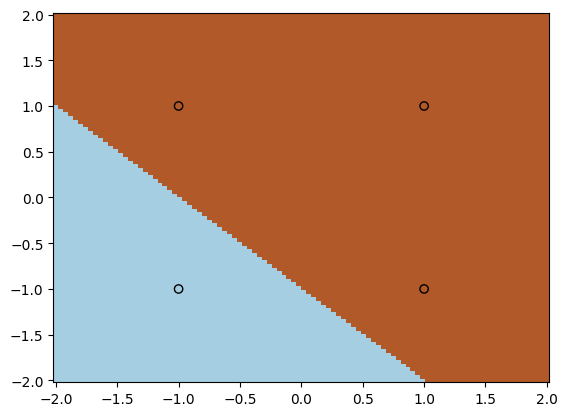

In [5]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    data_scaled,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto"
)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=target_or, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()

In [6]:
clf = svm.SVC(kernel='linear')
clf.fit(data_scaled, target_and);

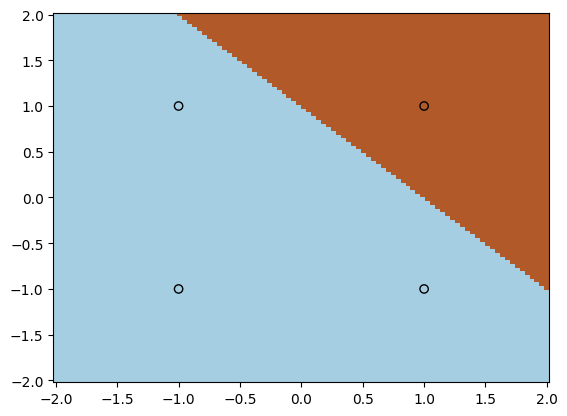

In [7]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    data_scaled,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto"
)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=target_and, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()

In [8]:
clf = svm.SVC(kernel='linear')
clf.fit(data_scaled, target_xor);

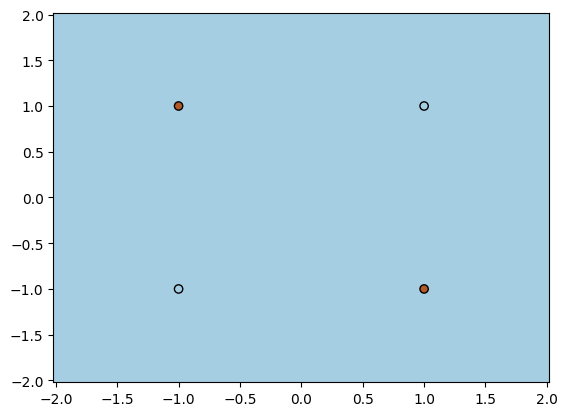

In [9]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    data_scaled,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto"
)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=target_xor, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()

In [10]:
def custom_kernel(X, Y):
    return np.abs(np.dot(X, Y.T))
    
clf = svm.SVC(kernel=custom_kernel)
clf.fit(data_scaled, target_xor);

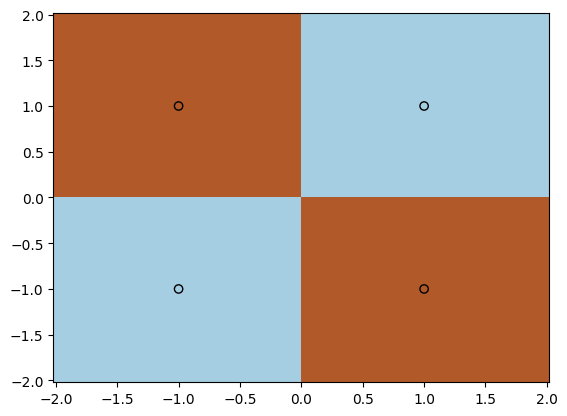

In [11]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    data_scaled,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto"
)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=target_xor, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()